# Graphic User Interface (GUI) Tutorial


## 0. Introduction
This tutorial will guide you through using the GUI for creating input files for a NERDSS simulation using a simple reaction of:
A+B-->C (A.B complex)


## 1. Importing ioNERDSS and running the GUI

Must have ioNERDSS python package installed before running the GUI. IoNERDSS can be installed using "pip install ioNERDSS" in the command line. 

In [ ]:
import ionerdss as io
io.gui()

After running the code as shown above, a window pops up with the Parameters tab being the first tab:

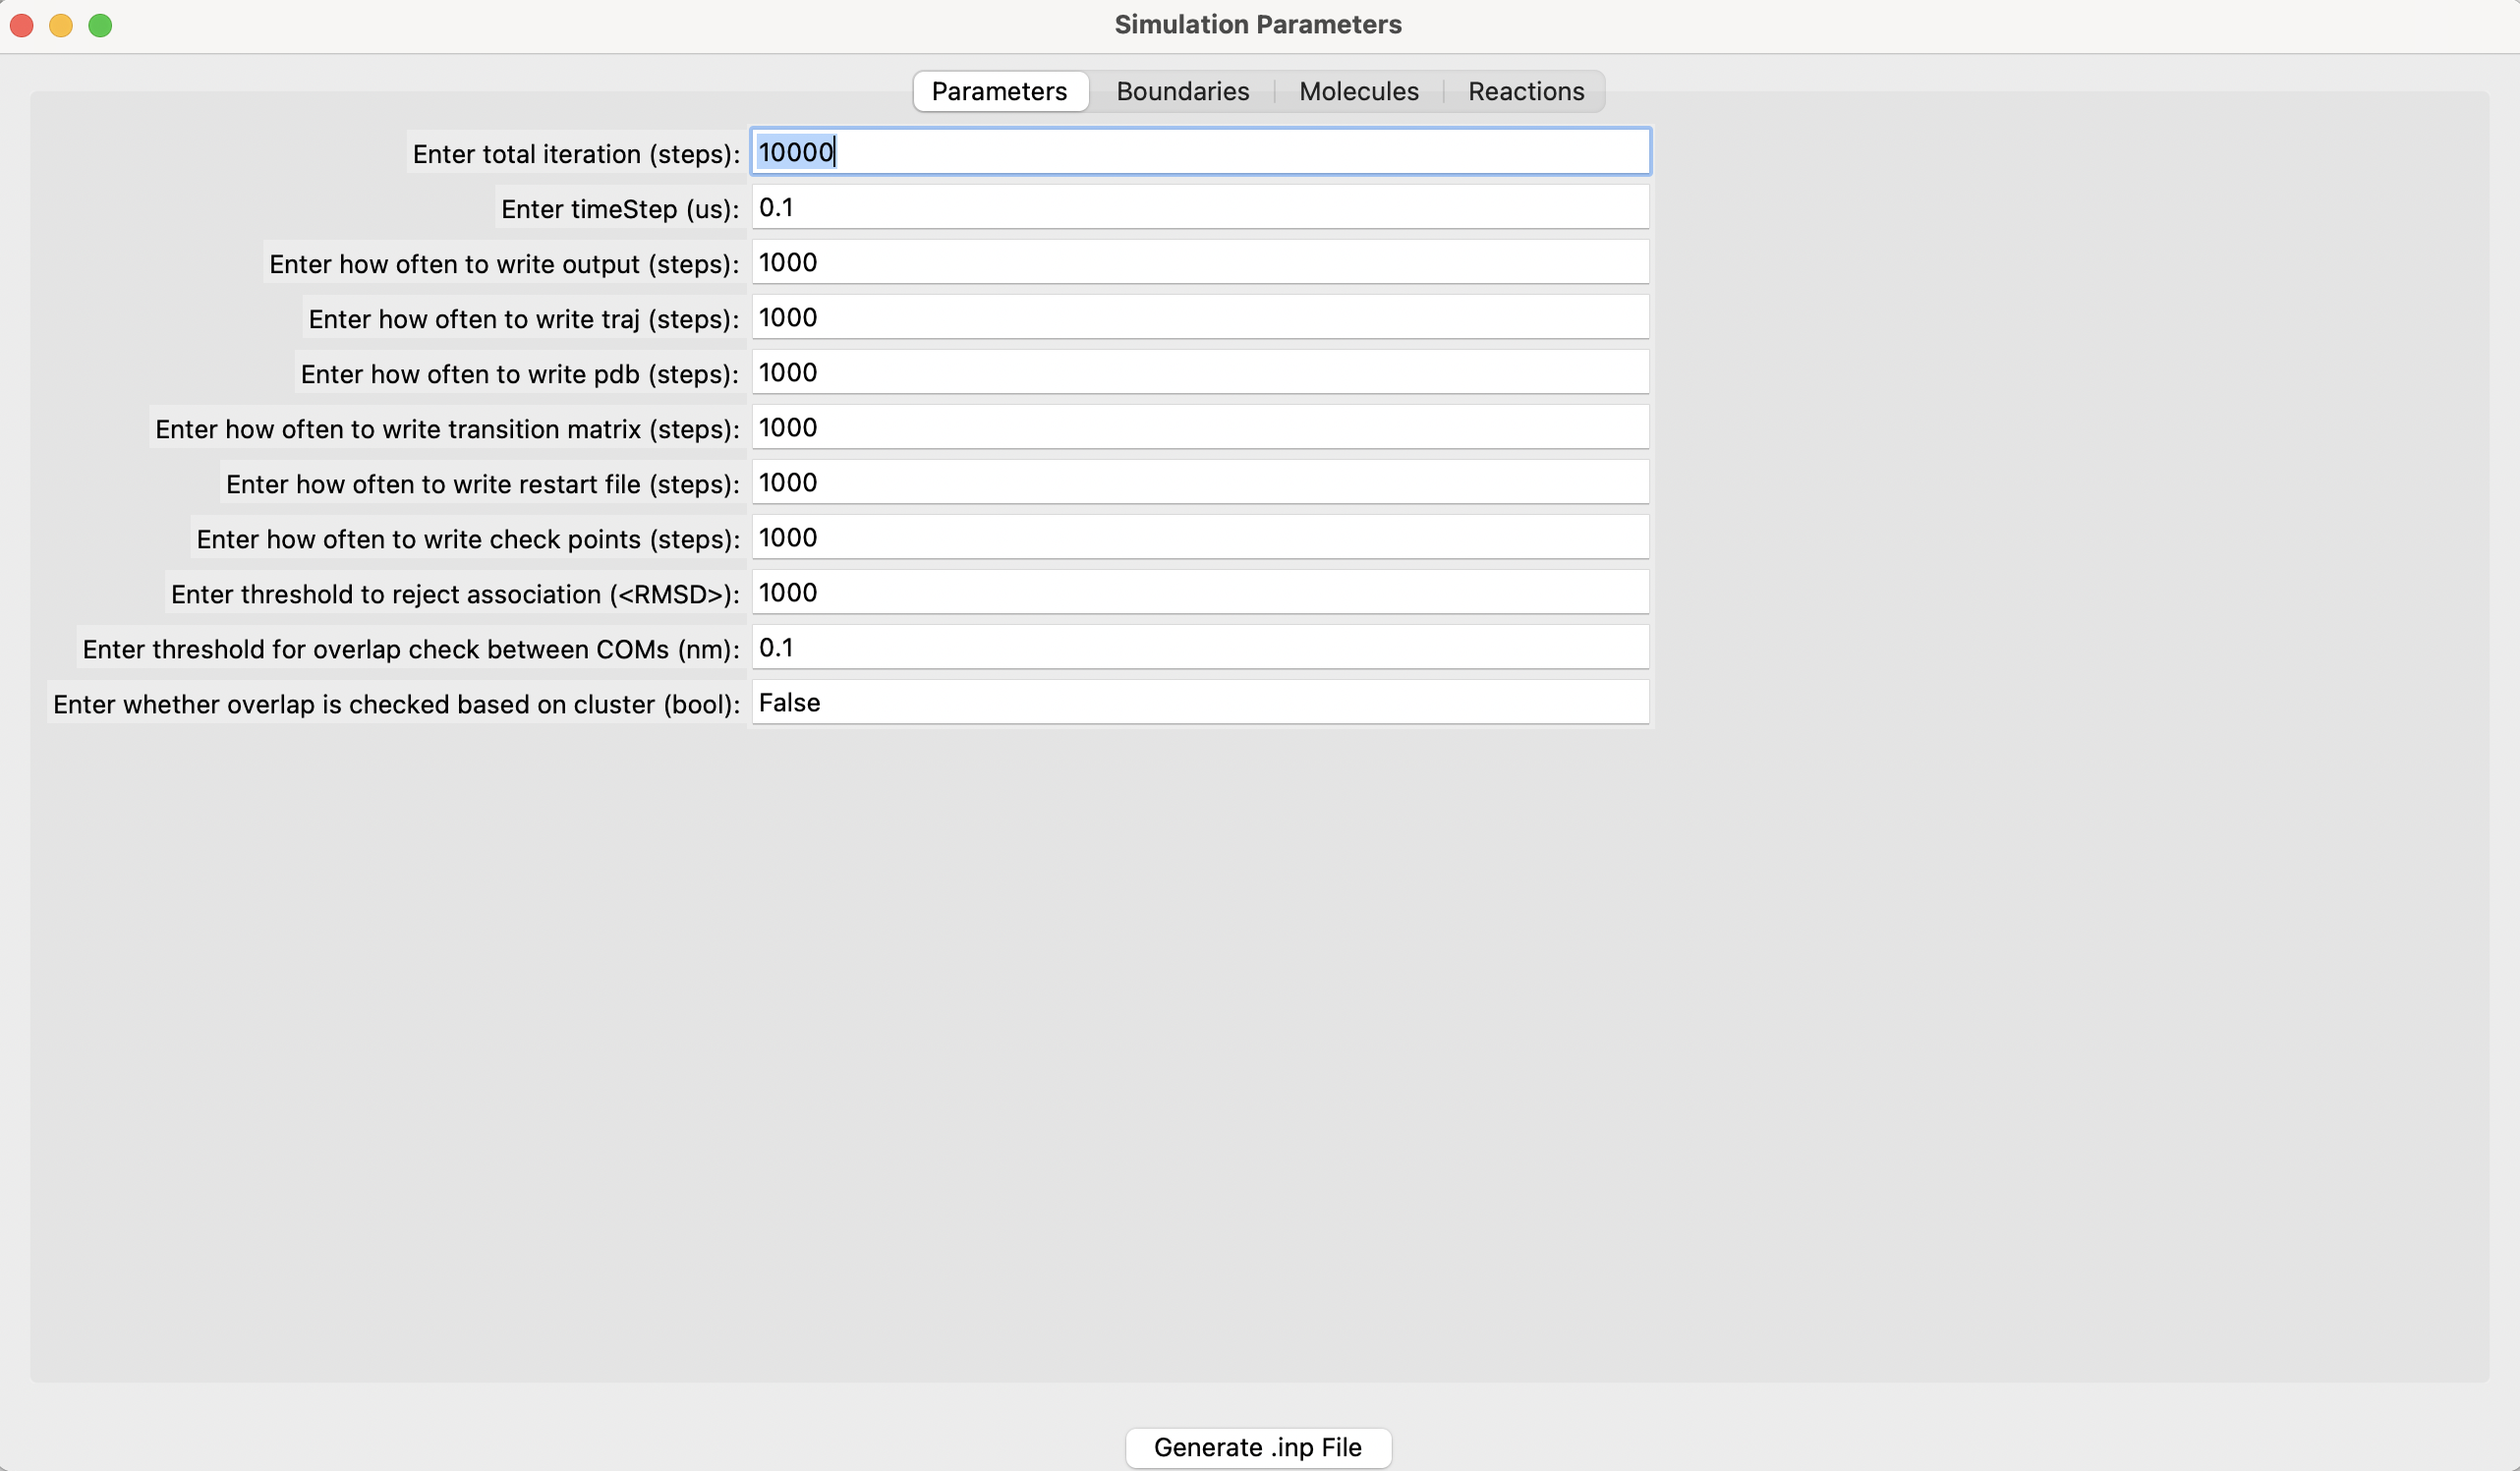

For more information on all of the user-specific inputs and what they mean, view the [ioNERDSS User Guide here](https://github.com/mjohn218/io_nerdss/blob/main/ioNERDSSUserGuide.pdf). 

Since this is a simple tutorial, all of the inputs will be whole numbers. Feel free to change up the numbers to test how it affects the simulation.

Beginning with the Parameters screen, the inputs are as followed: \
Total Iteration (steps): 10000 \
Enter timeStep (us):: 0.1 \
How often to write ___/Threshold to reject association: 1000 \
Threshold for overlap check between COMs (nm): 0.1 \
Whether overlap is checked based on cluster (bool): False 

The next tab is then the Boundaries screen as shown here:

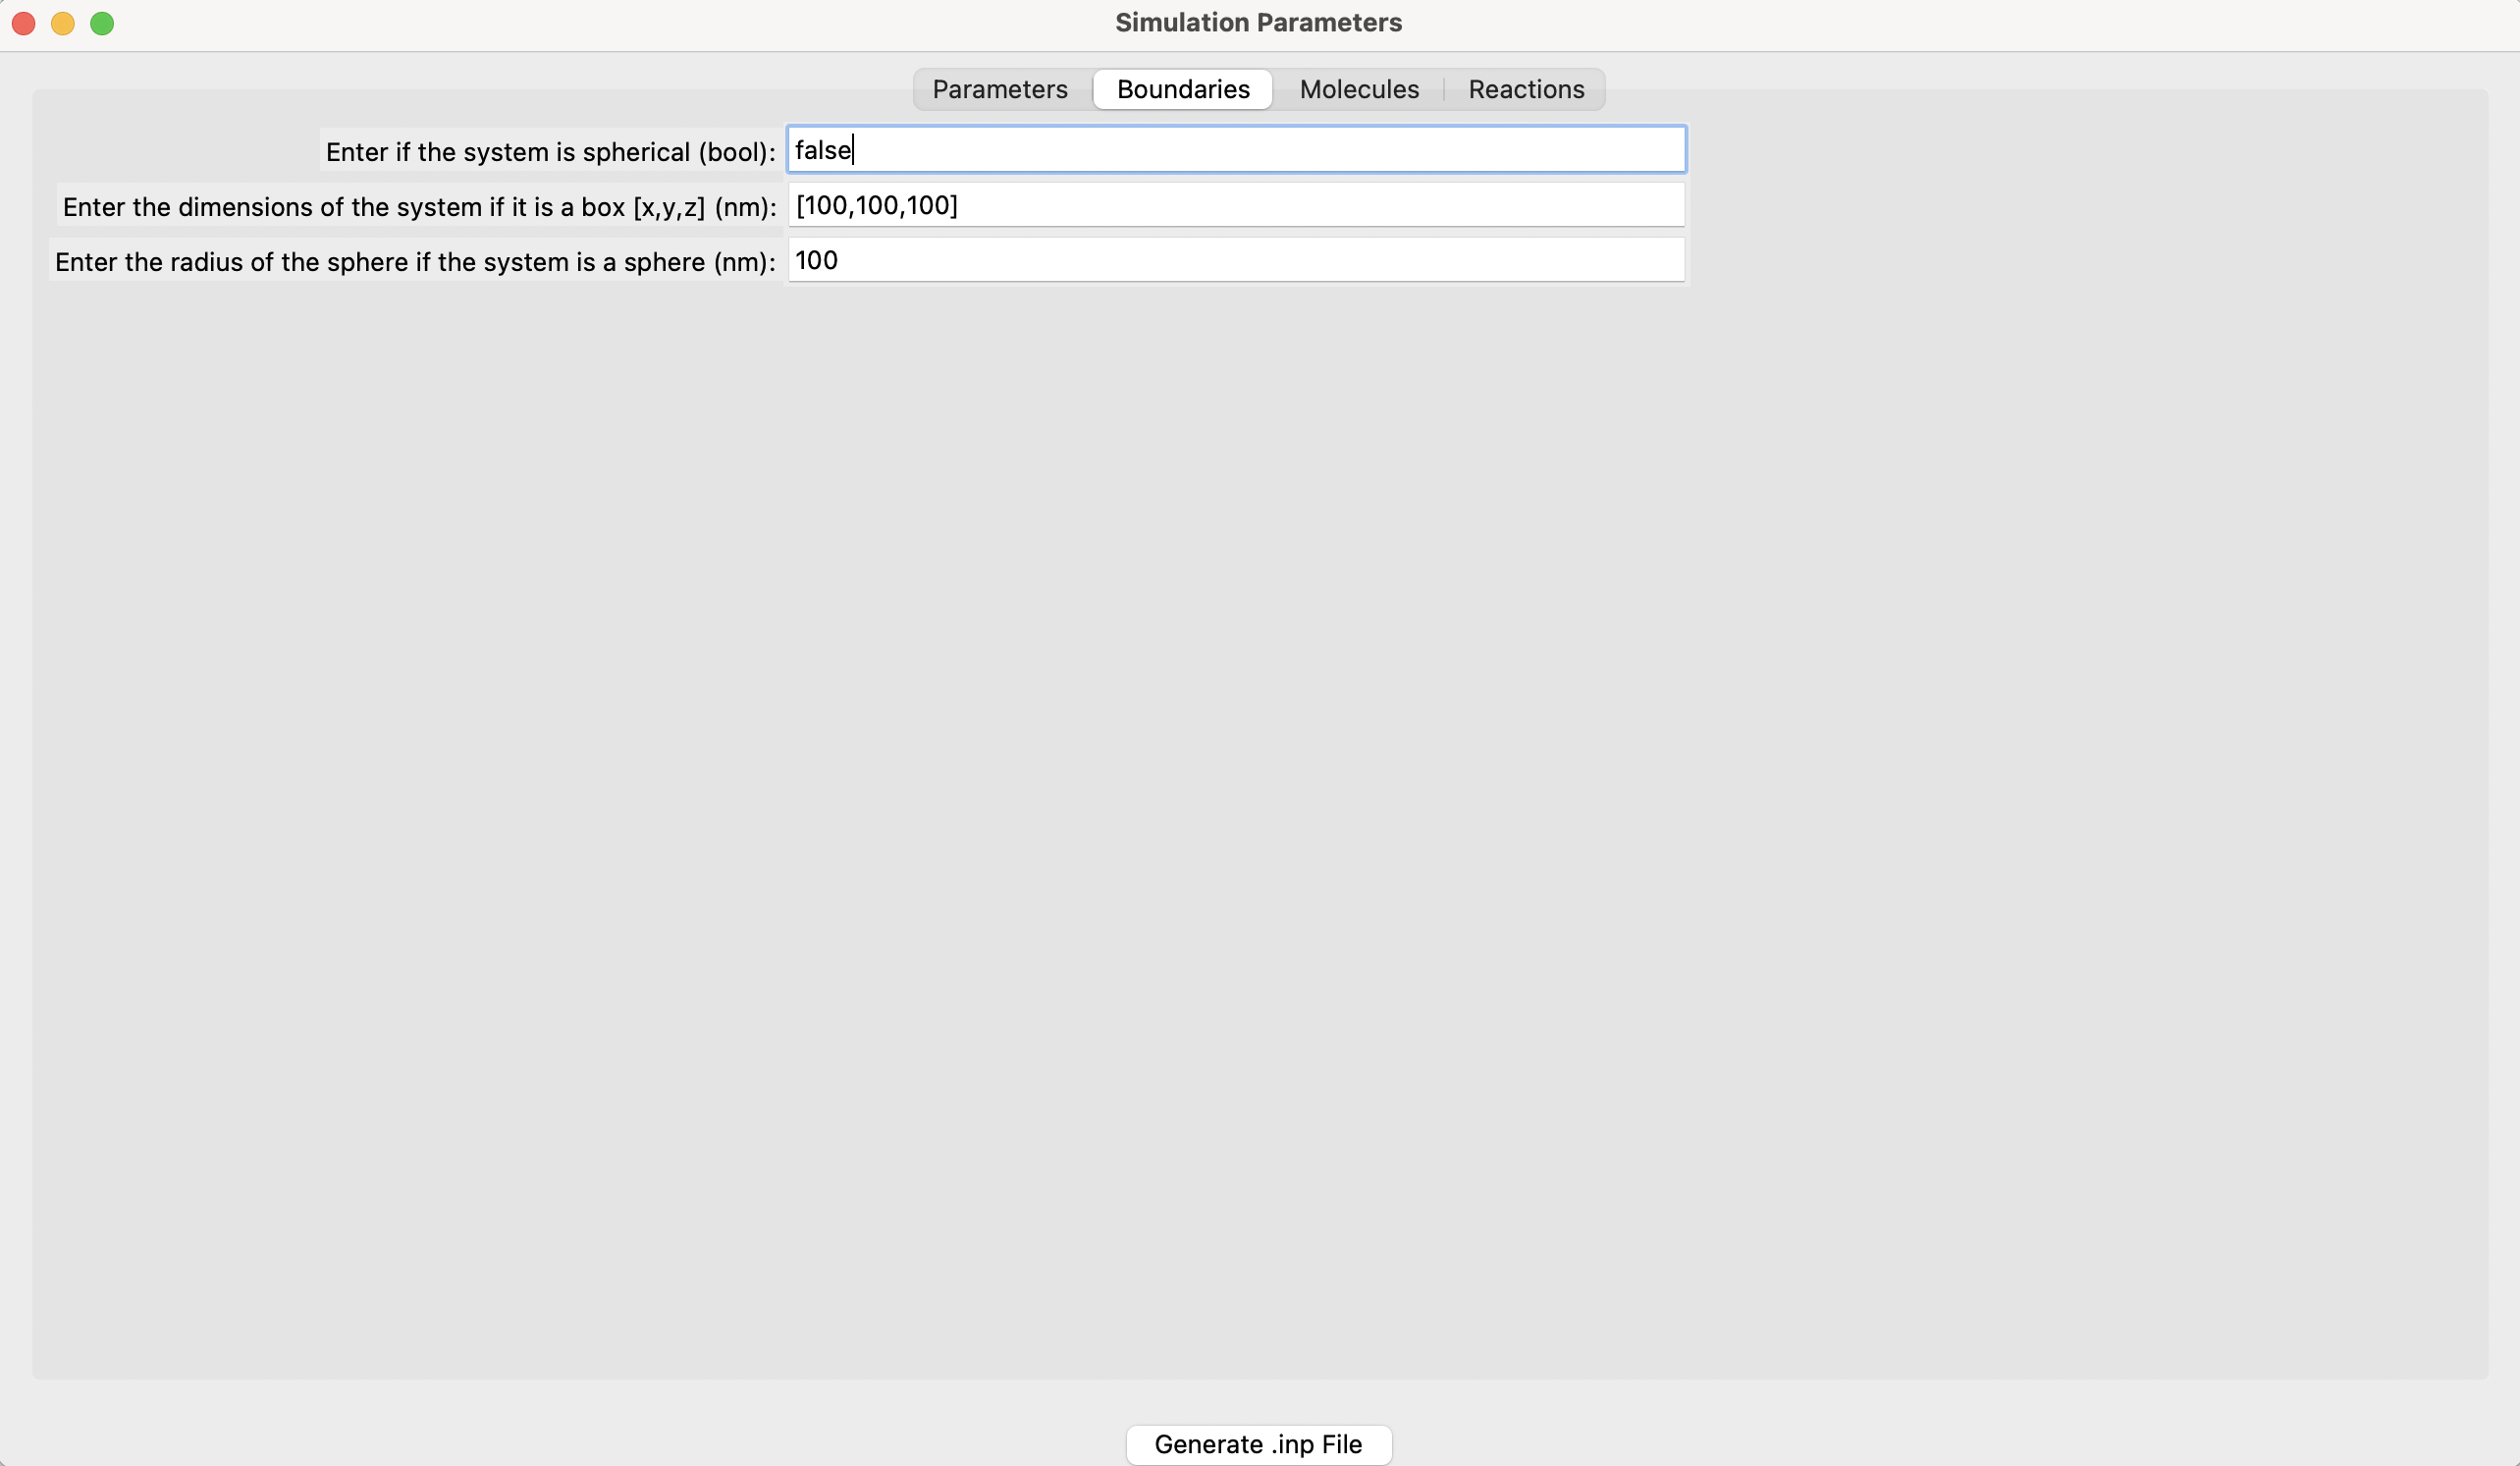

In the boundaries screen, the inputs are: \
Enter if the system is spherical (bool): False \
Enter the dimensions of the system if it is a box [x,y,z] (nm): [100,100,100] \
Enter the radius of the sphere if the system is a sphere (nm): Defaults to 100. 

The third tab is the Molecules tab:

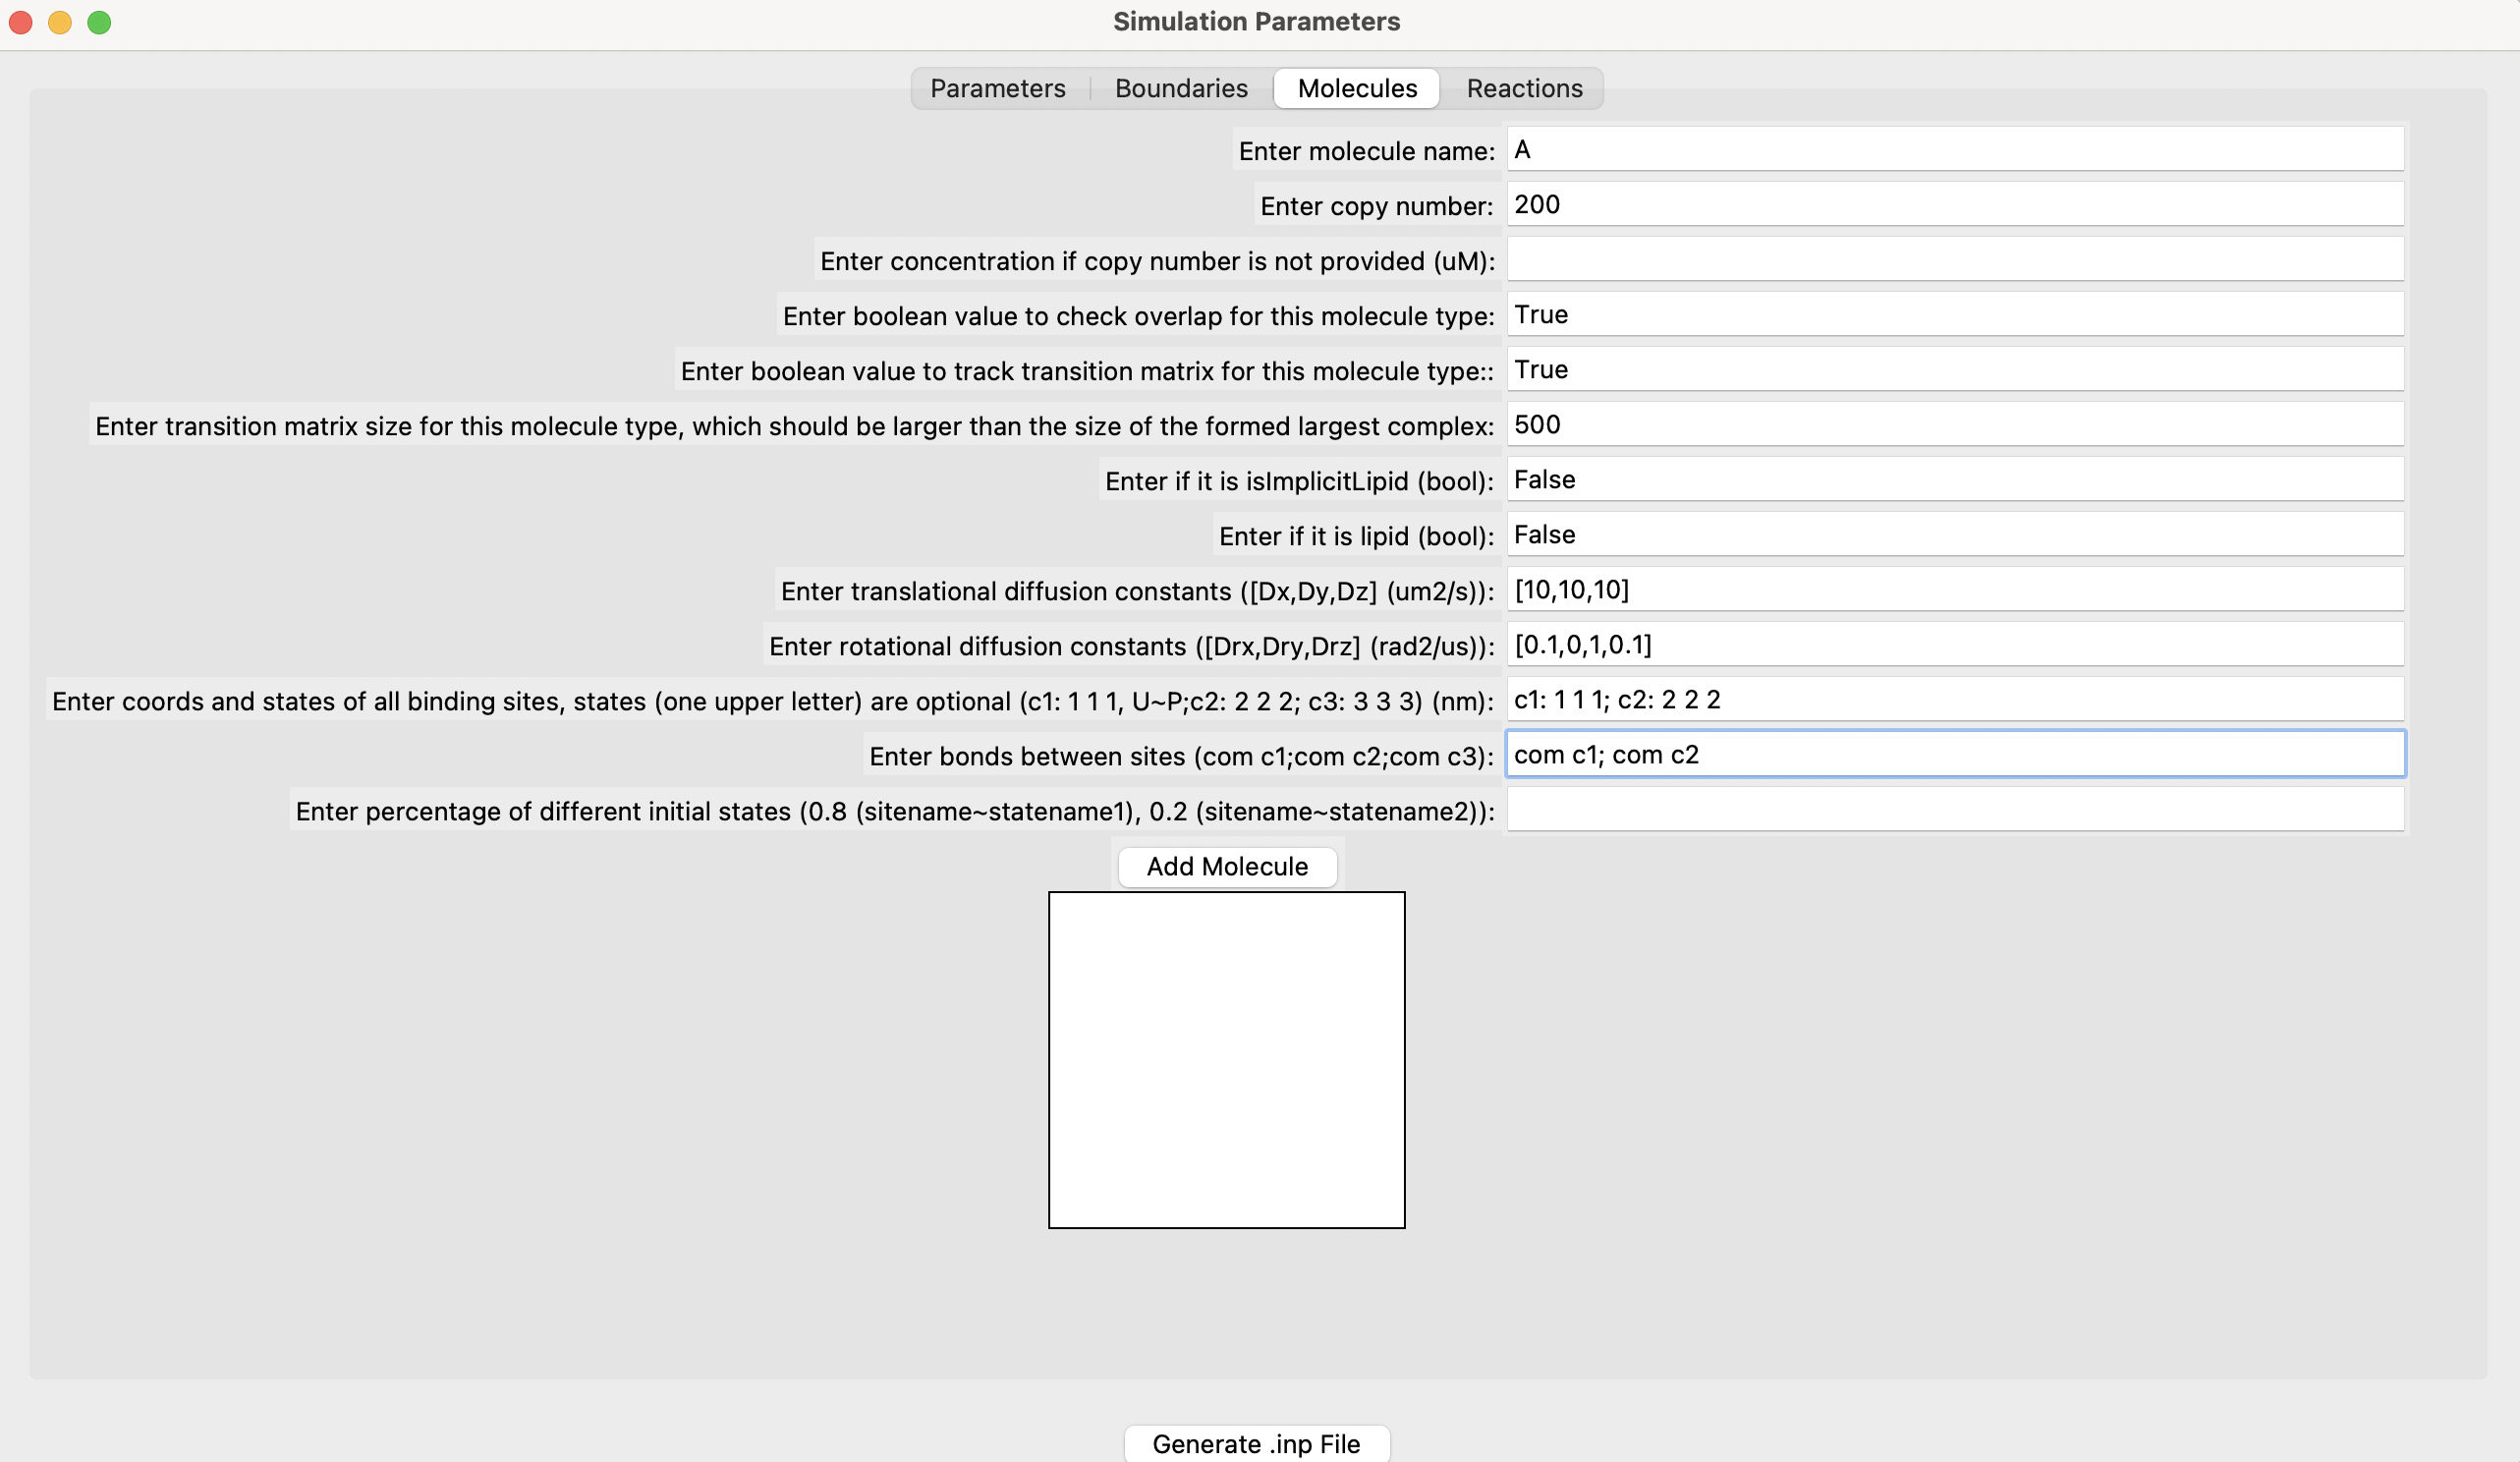

The simple reaction that the input files are being generated for is: A+B-->C (A.B complex). The first molecule to be added will be A, however, if there is a molecule in the reaction that is an implicid lipid, that molecule needs to be input first. \
The inputs for the molecule are: \
Enter molecule name: A \
Enter copy number: 200 (if you want to work with specific concentrations, leave this one blank and enter a concentration in the next line!) \
Enter boolean value to check overlap for this molecule type/transition matrix for this molecule type: True \
Transition matrix size for this molecule type: 500 \
If it is implicit lipid (bool): False \
If it is lipid (bool): False \
Translational diffusion constants [Dx,Dy,Dz] (um^2/s): [10,10,10] \
Rotational diffusion constants [Drx,Dry,Drz] (rad^2/us): [0.1,0.1,0.1] \
Coords and states of all binding sites: c1: 1 1 1; c2: 2 2 2
Bonds between sites: com c1; com c2 

After entering all of the information for the molecule, click "Add Molecule" and if the molecule was successfully added, a window will pop up that says: "___.mol has been successfully generated" and the molecule name and copy number/concentration should pop up in the box below. 

For each respective molecule, all of this information needs to be input, and it needs to be successfully added for it to generate the .mol file. \
For information regarding NERDSS input files, view the [NERDSS User Guide here](https://github.com/mjohn218/NERDSS/blob/master/NERDSS_USER_GUIDE.pdf).


For each reactant, a new molecule needs to be added. Therefore, all of this information needs to be input for the second reactant, B, as shown below:

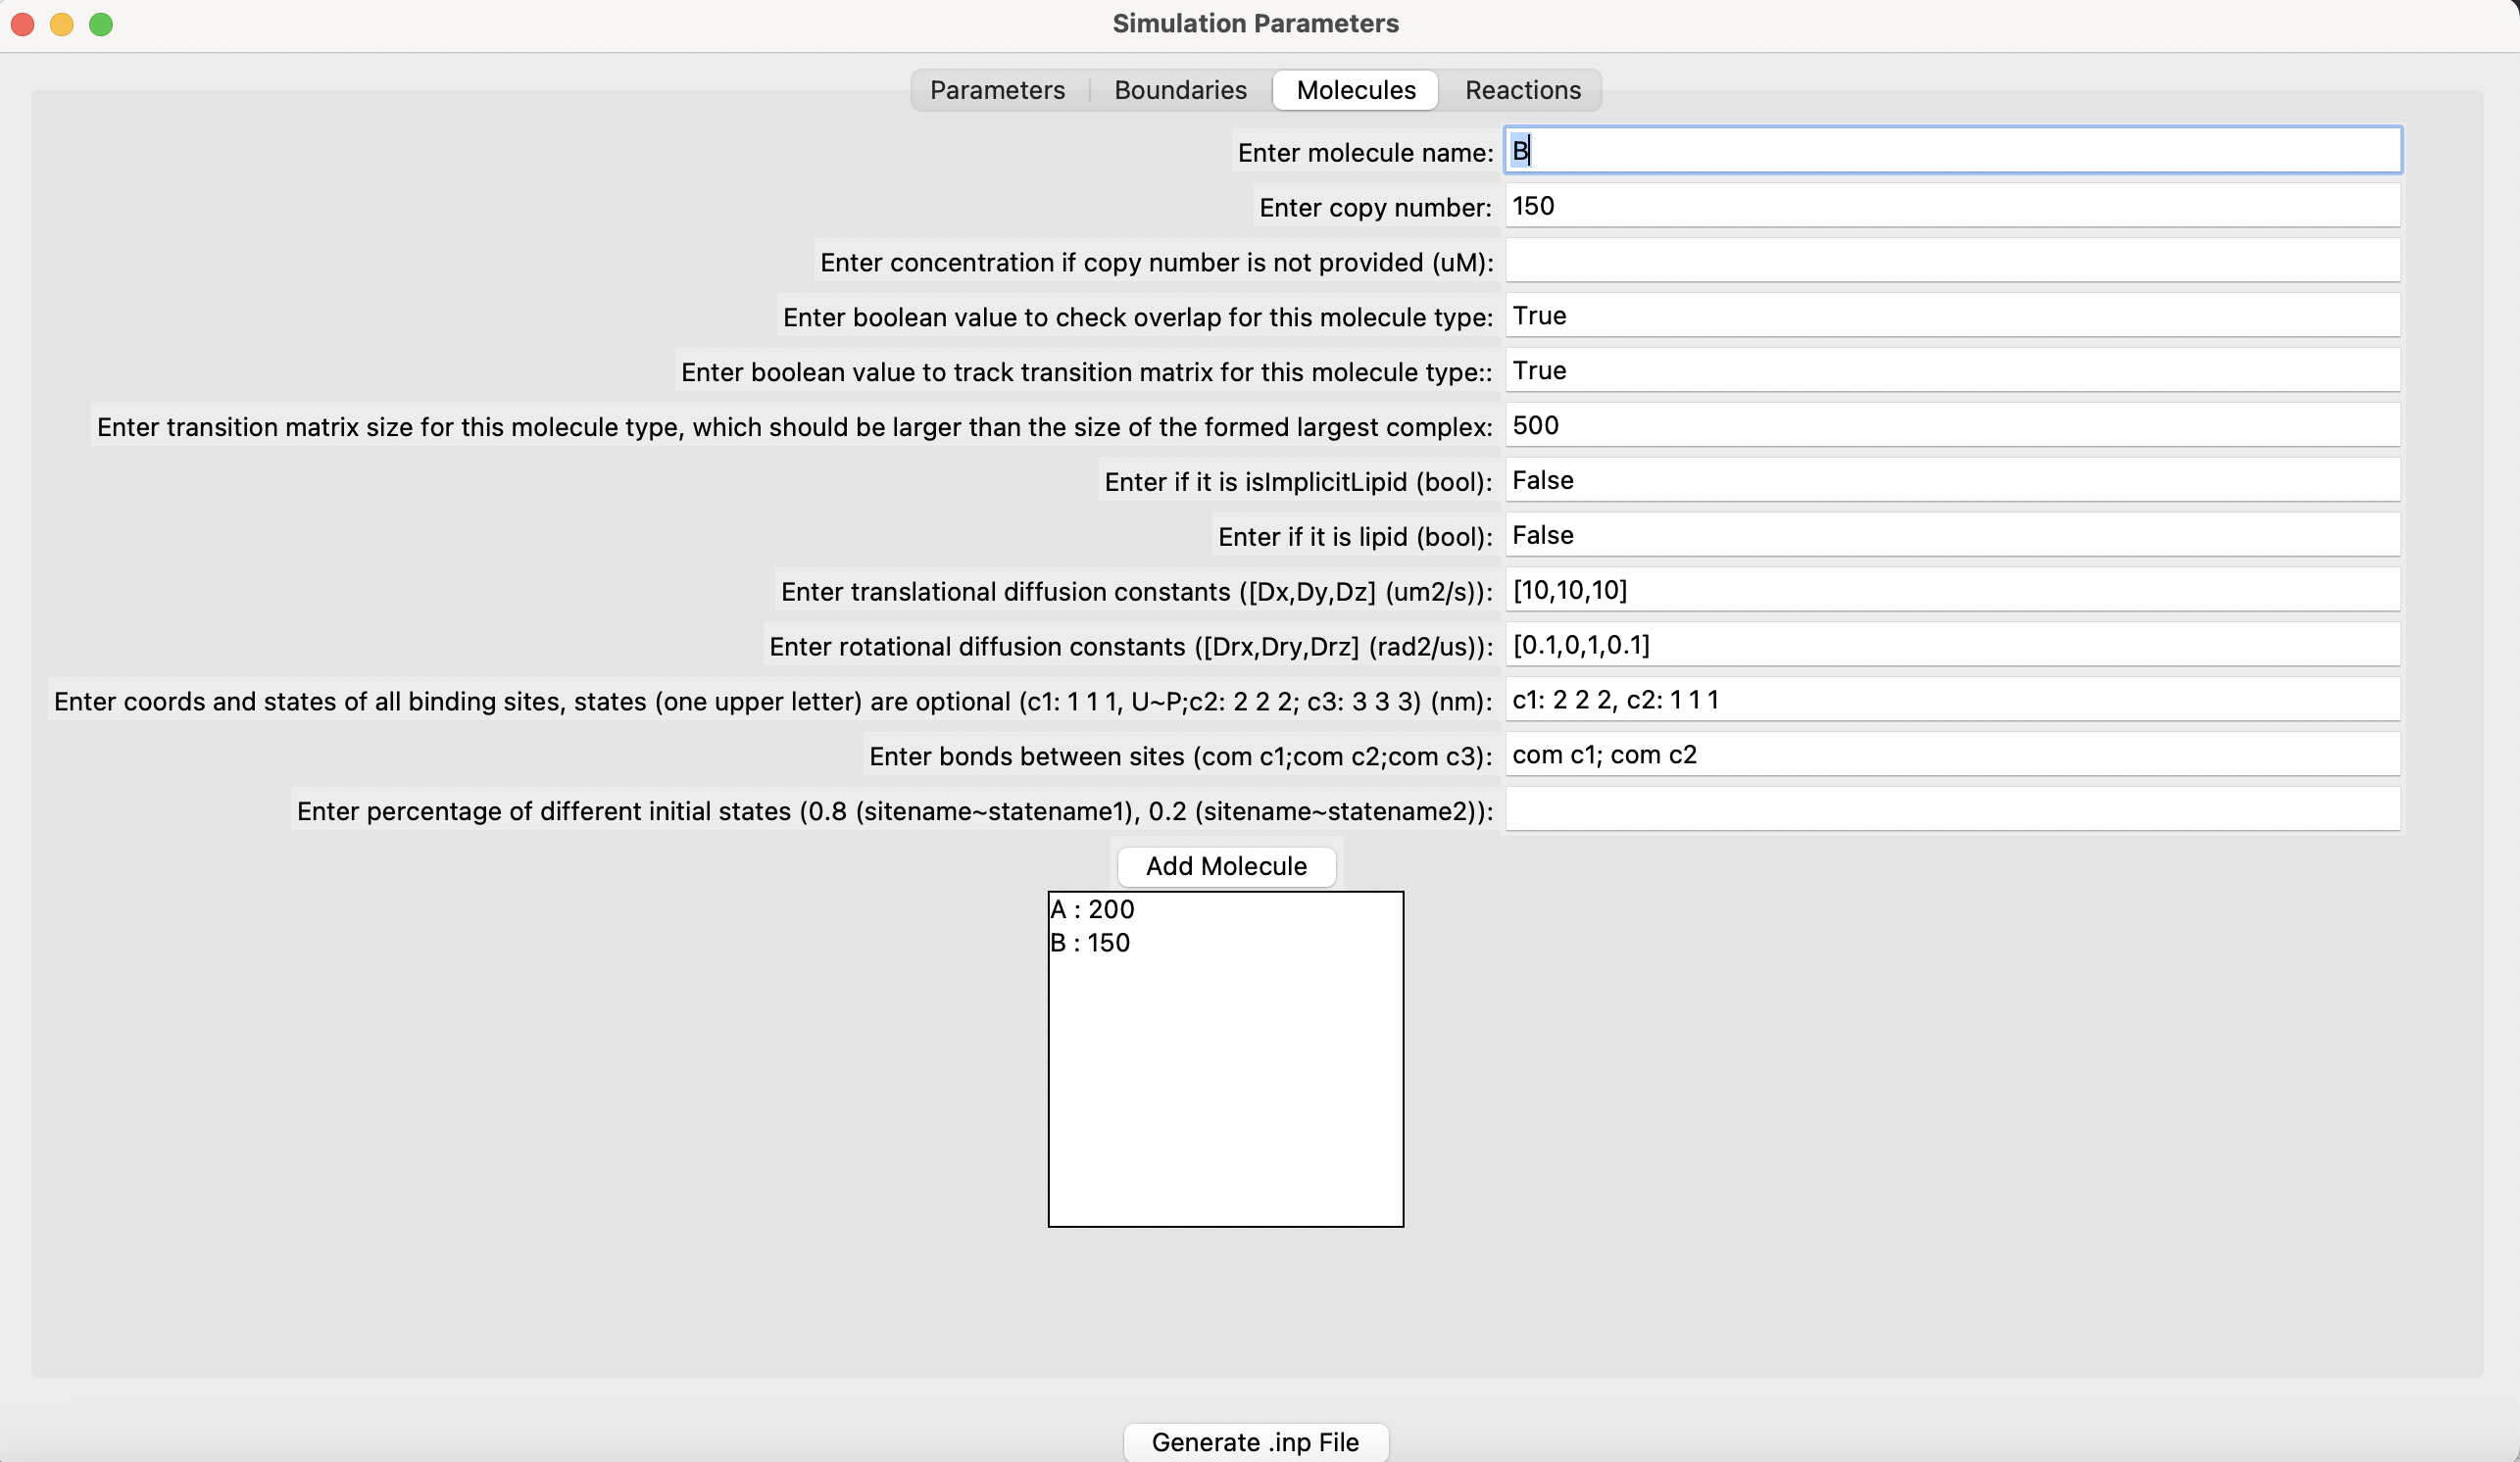

The inputs for this molecule are: \
Enter molecule name: B \
Enter copy number: 150 (if you want to work with specific concentrations, leave this one blank and enter a concentration in the next line!) \
Enter boolean value to check overlap for this molecule type/transition matrix for this molecule type: True \
Transition matrix size for this molecule type: 500 \
If it is implicit lipid (bool): False \
If it is lipid (bool): False \
Translational diffusion constants [Dx,Dy,Dz] (um^2/s): [10,10,10] \
Rotational diffusion constants [Drx,Dry,Drz] (rad^2/us): [0.1,0.1,0.1] \
Coords and states of all binding sites: c1: 2 2 2; c2: 1 1 1
Bonds between sites: com c1; com c2 

Again, after entering this information, click "Add Molecule" and a window should pop up stating that the .mol file was successfully generated. **Do not click "Generate .inp File" yet, instead go to the Reactions tab as shown below. 

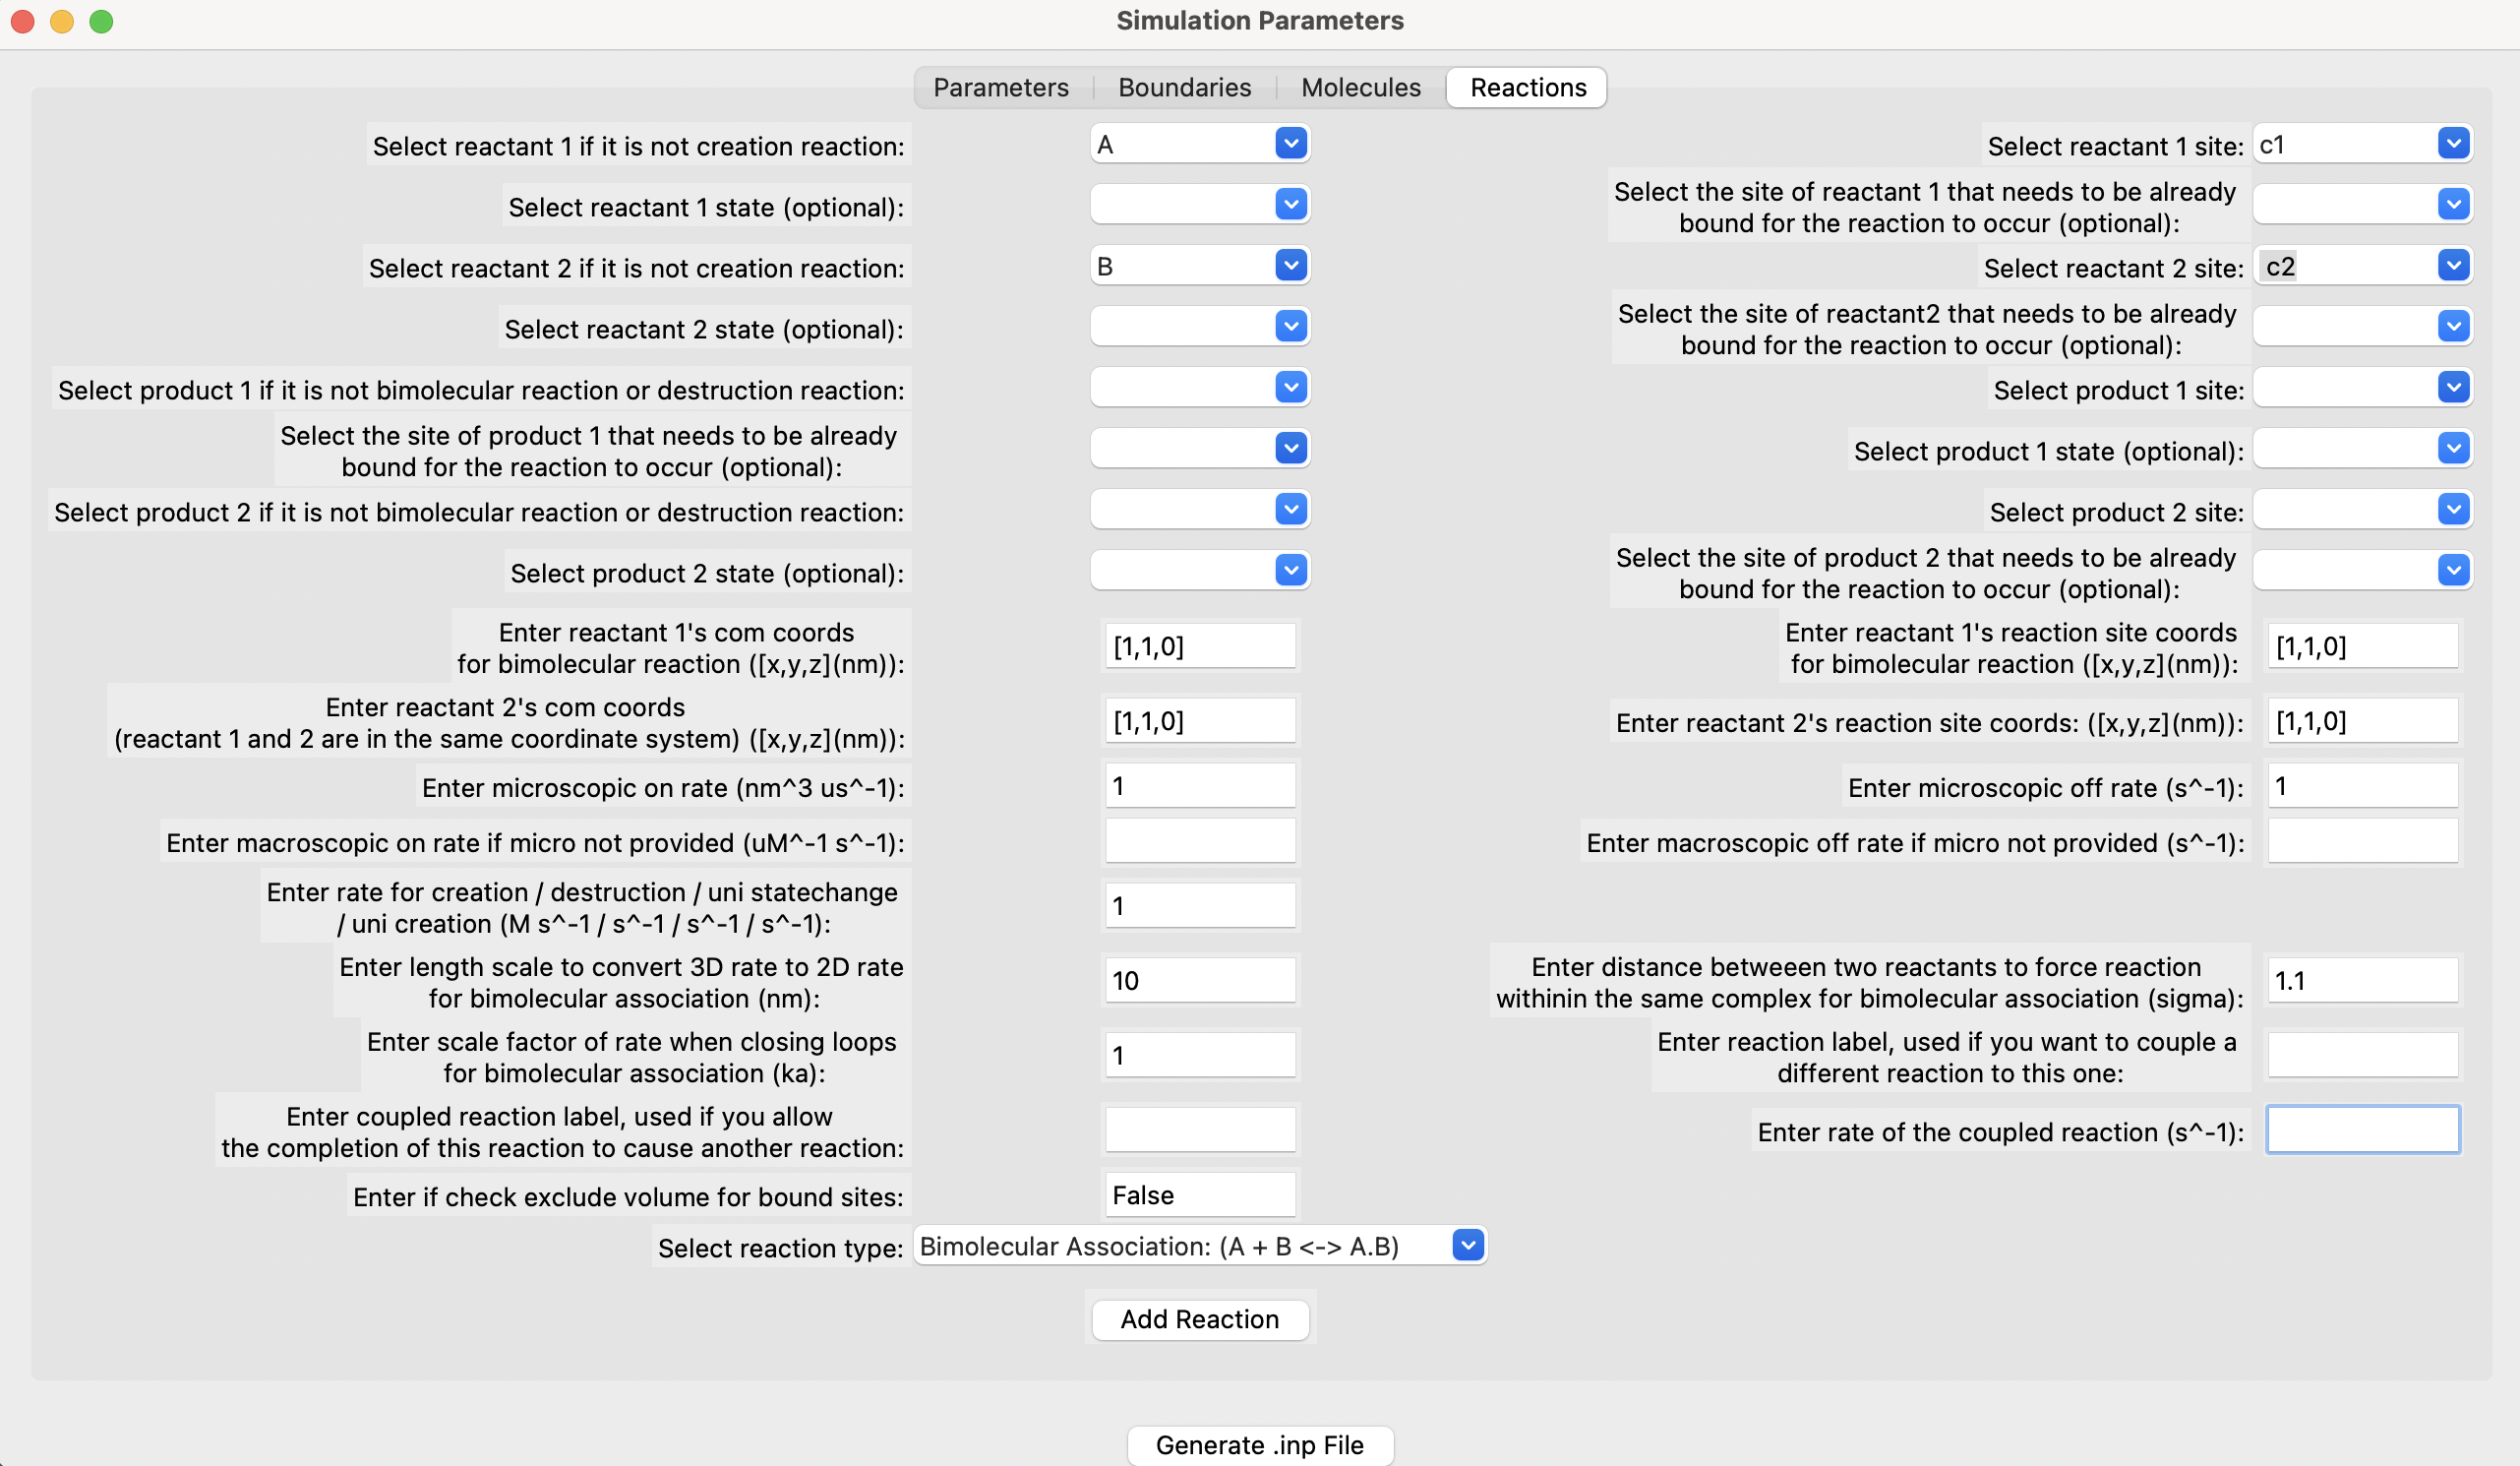

The Reactions tab is where the user inputs all of the information for the reaction, including the type of reaction. \
The inputs for this reaction are: \
Select reactant 1: A \
Select reactant 2: B \
Enter reactant 1's com coords for bimolecular reaction [x,y,z] (nm): [1,1,0] \
Enter reactant 2's com coords for bimolecular reaction [x,y,z] (nm): [1,1,0] \
Enter microscopic on rate (nm^3 us^-1): 1 \
Enter rate for creation (M s-1): 1 \
Enter length scale to convert 3D rate to 2D rate (nm): 10 \
Enter scale factor of rate when closing loops for bimolecular association (ka): 1 \
Enter if check exclude volume for bound sites: False \
Select reactant 1 site: c1 \
Select reactant 2 site: c2 \
Enter reactant 1's reaction site coords for bimolecular reaction [x,y,z] (nm): [1,1,0] \
Enter reactant 2's reaction site coords [x,y,z] (nm): [1,1,0] \
Enter microscopic off rate (s^-1): 1 \
Enter distance between two reactants to force reaction within the same complex for bimolecular association (sigma): 1.1 \
Select reaction type: Bimolecular Association (A+B <-> A.B) 

Then click "Add Reaction", a window should pop up stating "Reaction added" if the reaction was successfully added. If this window does not pop up, the reaction has not been added and there may be an issue with chosen parameters. 

After adding all molecules and reactions necessary, the "Generate .inp file" button should be clicked. This should save all mol files and the inp file within the working directory. To check working directory:

In [5]:
import os
os.getcwd()

'/Users/hannahroscom/Desktop/GUI Tutorial'

The working directory will then be shown, and the files should be found in that directory.

The parms.inp file that is generated should look like this if the molecules and reactions were successfully added: 

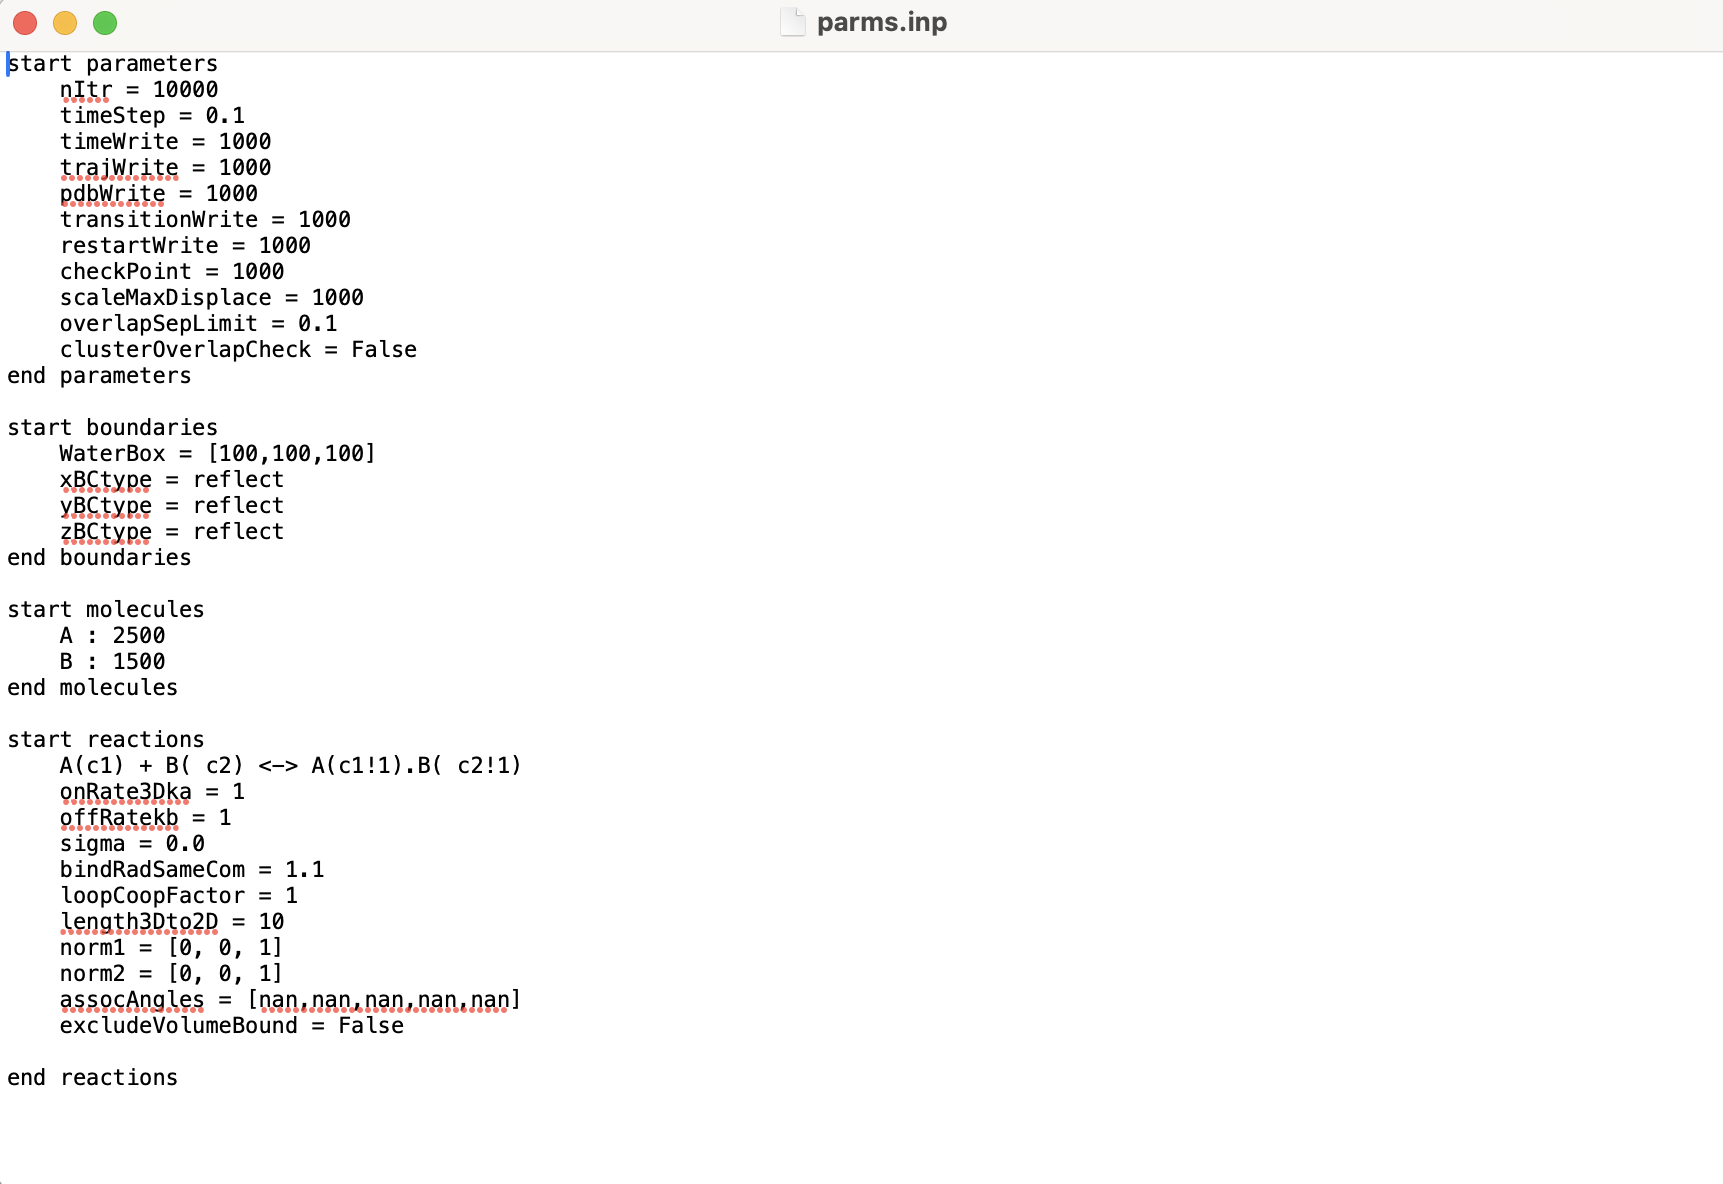

All of the information the user input is compiled into this parameters file that the NERDSS software uses to run the simulation.

To run a simulation with these files, simply put the .mol and the .parms files in a folder with the NERDSS executable, then change directory to that folder using the terminal/command line, and run NERDSS using "./nerdss -f parms.inp" in the terminal/command line. These instructions will only work if all of the steps to make/get NERDSS has been followed from the [NERDSS User Guide](https://github.com/mjohn218/NERDSS/blob/master/NERDSS_USER_GUIDE.pdf). 



## 2. Analyzing Output Files from a NERDSS Simulation

There are many different python functions within ioNERDSS to assist with analyzing and visualizing data from a NERDSS simulation. For tutorials for the different types of analysis, there is a [tutorials folder for ioNERDSS](https://github.com/mjohn218/io_nerdss/tree/main/Tutorial) that contains many tutorials based off of what type of reaction is being simulated. 


An example of a visualization/analysis of the data would be the 3D histogram function as shown below: 

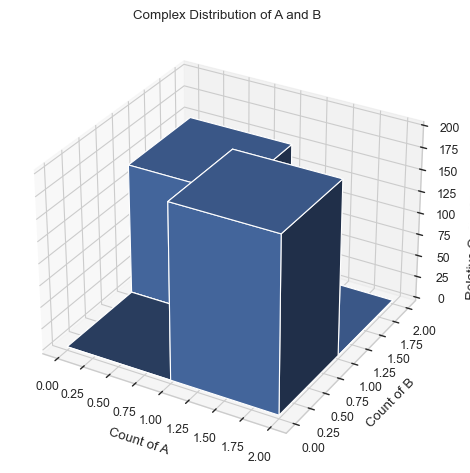

In [3]:
multi_species=io.MultiHistogram(FileName="histogram_complexes_time.dat", FileNum=1, InitialTime=0.0,FinalTime=1.0,SpeciesList=["A","B"])
result = multi_species.hist_3D_complex_dist(xAxis = 'A', yAxis = 'B', xBarSize = 1, yBarSize = 1)

There are many functions to visualize and analyze the data from a NERDSS run, feel free to try them out with any reaction created within the GUI!